## Cat Boosting

[visit](https://www.geeksforgeeks.org/catboost-ml/?ref=lbp)

## LightGBM
[visit for more](https://www.geeksforgeeks.org/lightgbm-light-gradient-boosting-machine/)

## LightGBM (Light Gradient Boosting Machine)

In [42]:
!pip install lightgbm

In [43]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [44]:
data = pd.read_csv('SVMtrain.csv')

In [45]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.6+ KB
None


In [46]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3


<Axes: >

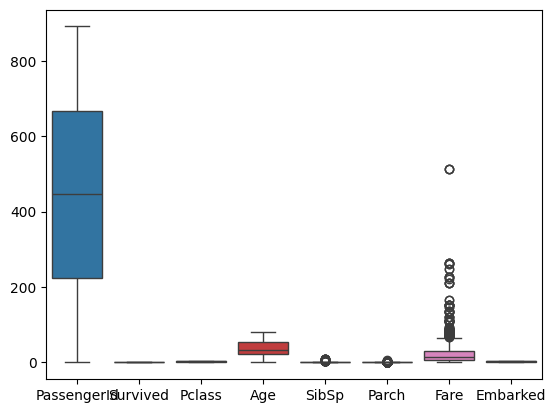

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data)

In [48]:
from sklearn.preprocessing import  LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,3
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,3
3,4,1,1,1,35.0,1,0,53.1000,3
4,5,0,3,0,35.0,0,0,8.0500,3


In [49]:
x = data.drop(['Embarked','PassengerId'], axis=1)
y = data['Embarked']

In [50]:
print("X dataset ____ \n", x.head())
print("Y dataset ____\n", y.head())

X dataset ____ 
    Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0         0       3    0  22.0      1      0   7.2500
1         1       1    1  38.0      1      0  71.2833
2         1       3    1  26.0      0      0   7.9250
3         1       1    1  35.0      1      0  53.1000
4         0       3    0  35.0      0      0   8.0500
Y dataset ____
 0    3
1    1
2    3
3    3
4    3
Name: Embarked, dtype: int64


In [51]:
y.value_counts()

Embarked
3    644
1    168
2     77
Name: count, dtype: int64

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [53]:
parmas = {
    'boosting_type': 'gbdt',
    'objective':'multiclass',
    'metrics':'multi_logloss',
    'num_class':4,
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 1
}

In [54]:
lgb_train  = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test)

model = lgb.train(parmas, lgb_train, num_boost_round=1000, valid_sets=lgb_test)

y_pred = model.predict(X_test, num_iteration=model.best_iteration)



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 711, number of used features: 7
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -1.683871
[LightGBM] [Info] Start training from score -2.392285
[LightGBM] [Info] Start training from score -0.324449
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [55]:
print("Accuracy Score: ", metrics.accuracy_score(y_test, y_pred.argmax(axis=1)))

Accuracy Score:  0.8089887640449438


In [56]:
print("Accuracy Score: ", model.score(X_train,y_train))

AttributeError: 'Booster' object has no attribute 'score'

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

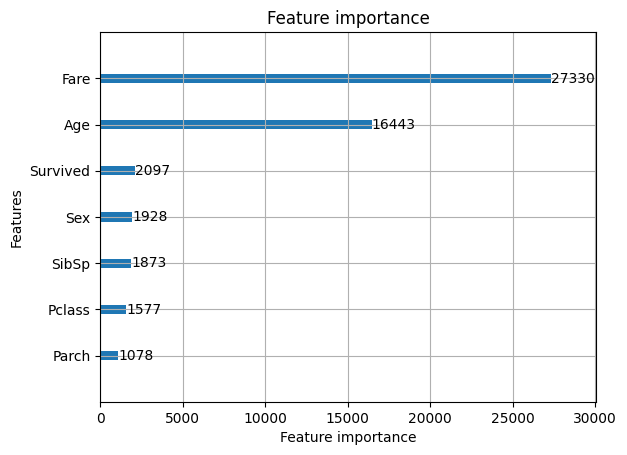

In [ ]:
lgb.plot_importance(model)

In [ ]:
lgb.plot_metric(model)

TypeError: booster must be dict or LGBMModel. To use plot_metric with Booster type, first record the metrics using record_evaluation callback then pass that to plot_metric as argument `booster`

ImportError: You must install graphviz and restart your session to plot tree.

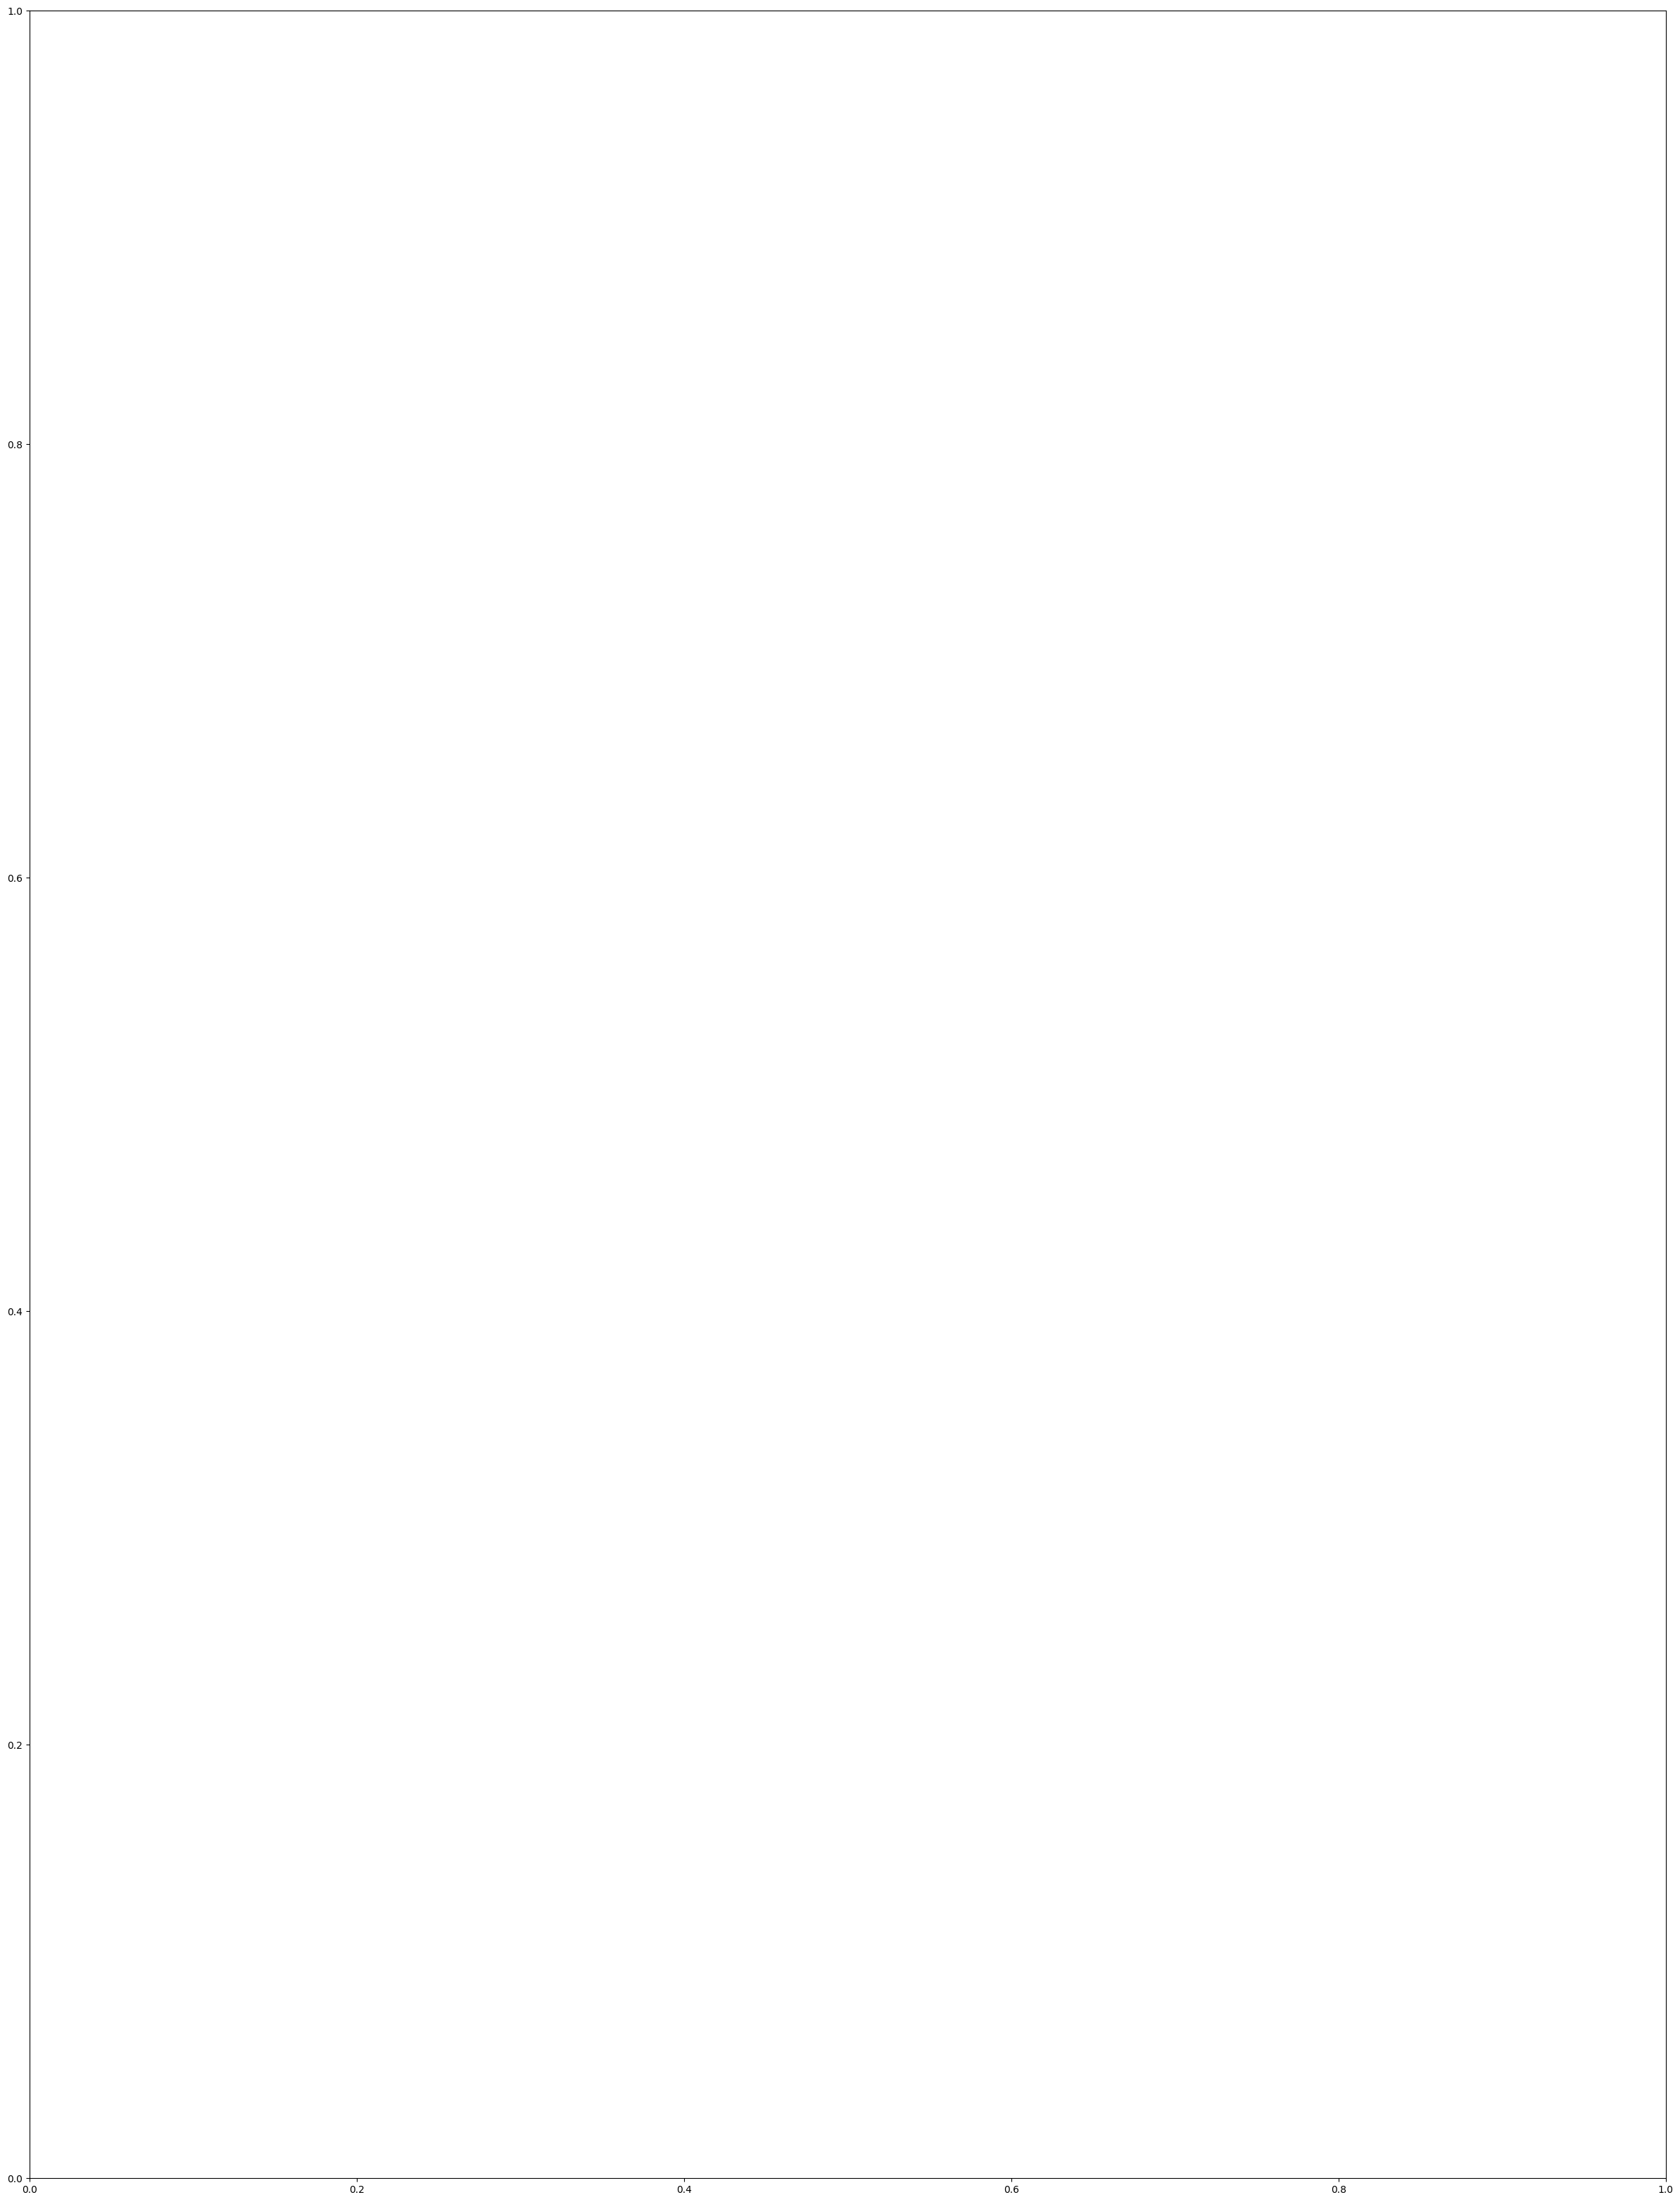

In [ ]:
lgb.plot_tree(model,figsize=(30,40))

## Cat Boosting

In [ ]:
!pip install catboost

   ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/101.0 MB 3.1 MB/s eta 0:00:34
   ---------------------------------------- 0.4/101.0 MB 4.1 MB/s eta 0:00:25
   ---------------------------------------- 0.6/101.0 MB 4.4 MB/s eta 0:00:24
   ---------------------------------------- 0.9/101.0 MB 4.5 MB/s eta 0:00:23
   ---------------------------------------- 1.1/101.0 MB 4.6 MB/s eta 0:00:22
    --------------------------------------- 1.3/101.0 MB 4.6 MB/s eta 0:00:22
    --------------------------------------- 1.6/101.0 MB 4.7 MB/s eta 0:00:22
    --------------------------------------- 1.8/101.0 MB 4.8 MB/s eta 0:00:21
    --------------------------------------- 2.0/101.0 MB 4.8 MB/s eta 0:00:21
    --------------------------------------- 2.2/101.0 MB 4.8 MB/s eta 0:00:21
    --------------------------------------- 2.5/101.0 MB 4.8 MB/s eta 0:00:21


In [30]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

In [31]:
train_data = pd.read_csv('train_v9rqX0R (1).csv')
test_data = pd.read_csv('test_AbJTz2l (1).csv')

In [32]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [33]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [34]:
test_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [35]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [36]:
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace=True)
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0], inplace=True)
test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(), inplace=True)
test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0], inplace=True)

In [37]:
X = train_data.drop('Item_Outlet_Sales', axis=1)
y = train_data['Item_Outlet_Sales']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
X.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [41]:
categorial_features_indices = np.where(X.dtypes !=float)[0]

In [42]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(iterations=50, depth=3,learning_rate=0.1,loss_function="RMSE")


In [43]:
!pip install ipywidgets ipython

In [44]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
model.fit(X_train,y_train, cat_features=categorial_features_indices,eval_set=(X_test, y_test),plot=True)



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1639.0521039	test: 1569.3477590	best: 1569.3477590 (0)	total: 7.86ms	remaining: 385ms
1:	learn: 1568.0424608	test: 1496.7331352	best: 1496.7331352 (1)	total: 18.6ms	remaining: 446ms
2:	learn: 1507.3966980	test: 1434.9226758	best: 1434.9226758 (2)	total: 24.8ms	remaining: 389ms
3:	learn: 1453.8988139	test: 1381.6015206	best: 1381.6015206 (3)	total: 33.8ms	remaining: 389ms
4:	learn: 1408.5482705	test: 1335.1667770	best: 1335.1667770 (4)	total: 39.9ms	remaining: 359ms
5:	learn: 1368.7353423	test: 1295.8821117	best: 1295.8821117 (5)	total: 48.2ms	remaining: 353ms
6:	learn: 1334.8090034	test: 1261.4532285	best: 1261.4532285 (6)	total: 54.4ms	remaining: 334ms
7:	learn: 1303.9114056	test: 1230.1172026	best: 1230.1172026 (7)	total: 90.2ms	remaining: 474ms
8:	learn: 1278.0365998	test: 1203.6064652	best: 1203.6064652 (8)	total: 98.3ms	remaining: 448ms
9:	learn: 1255.2687794	test: 1179.9293117	best: 1179.9293117 (9)	total: 105ms	remaining: 418ms
10:	learn: 1233.9395208	test: 1158.889078